In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

TODO1

In [7]:
df = pd.read_csv("train(2).csv")

# Select the features for clustering
features = df[["GrLivArea", "GarageArea"]]

# Standardize the features (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


TODO2

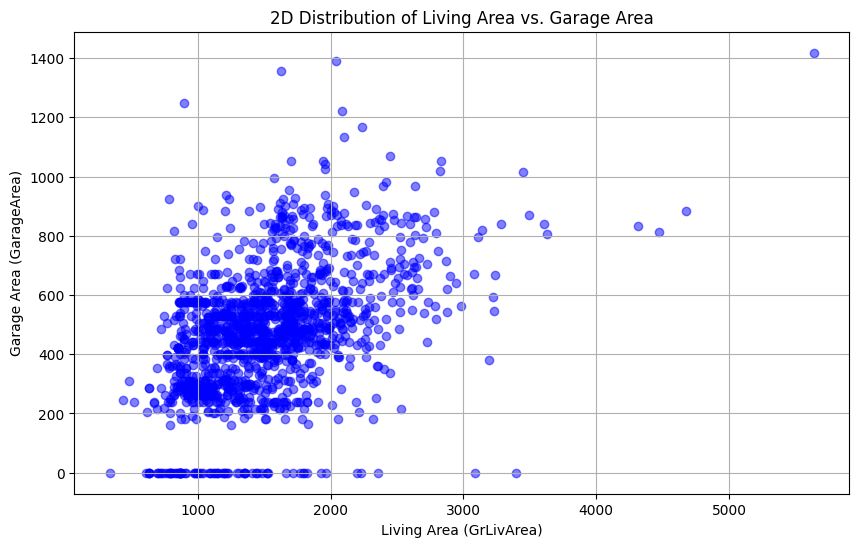

In [8]:
# Extract the two variables: GrLivArea and GarageArea
grlivarea = df["GrLivArea"]
garagearea = df["GarageArea"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grlivarea, garagearea, c='b', marker='o', alpha=0.5)
plt.title("2D Distribution of Living Area vs. Garage Area")
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Garage Area (GarageArea)")
plt.grid(True)
plt.show()


TODO3

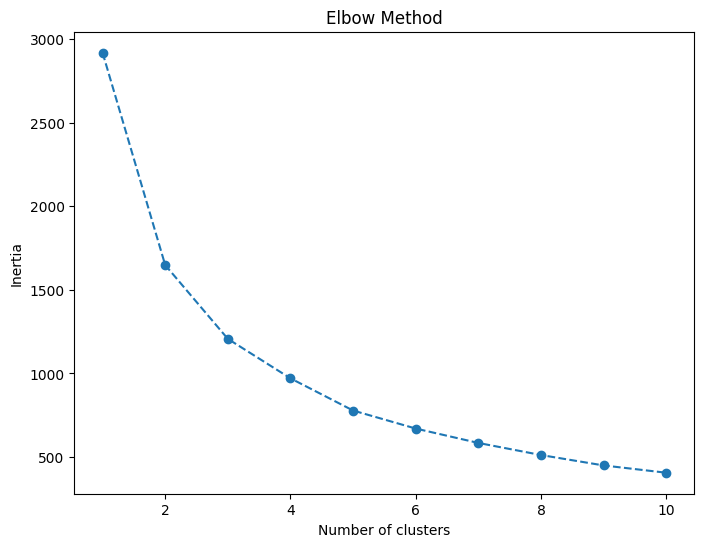

In [9]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=6804)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to identify the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


based on Elbow Method plot
optimal clusters could be 4

c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Numbers:
Cluster 1:
      GrLivArea  GarageArea
0          1710         548
1          1262         460
3          1717         642
5          1362         480
6          1694         636
...         ...         ...
1444       1422         626
1448       1346         384
1450       1792           0
1451       1578         840
1455       1647         460

[576 rows x 2 columns]
Cluster 2:
      GrLivArea  GarageArea
2          1786         608
4          2198         836
7          2090         484
8          1774         468
11         2324         736
...         ...         ...
1437       1932         774
1442       2007         812
1447       2090         556
1456       2073         500
1457       2340         252

[301 rows x 2 columns]
Cluster 3:
      GrLivArea  GarageArea
35         2452         691
58         2945         641
65         2473         852
112        2696         792
118        3222         594
...         ...         ...
1386       2784         564
1387  

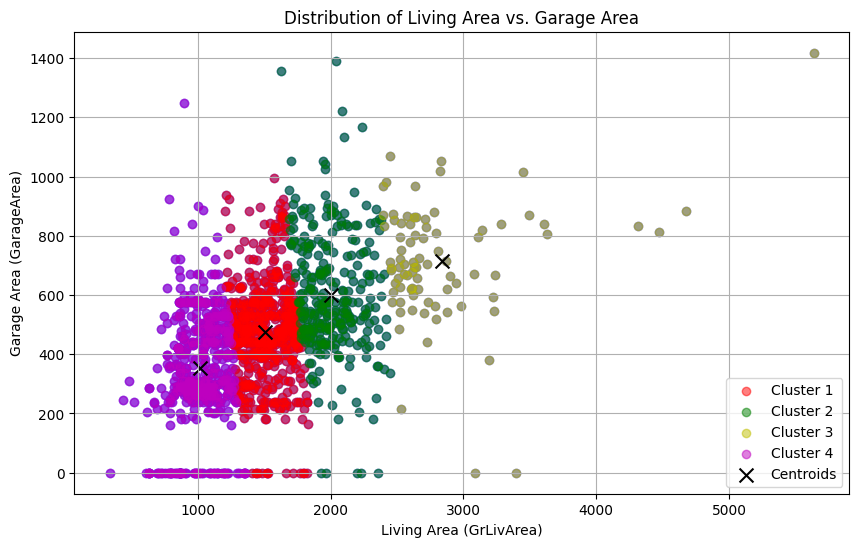

In [10]:
# Extract the two variables: GrLivArea and GarageArea
X = df[["GrLivArea", "GarageArea"]]

# Create a scatter plot to guess the number of clusters
plt.figure(figsize=(10, 6))
plt.scatter(X["GrLivArea"], X["GarageArea"], c='b', marker='o', alpha=0.5)
plt.title("Distribution of Living Area vs. Garage Area")
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Garage Area (GarageArea)")
plt.grid(True)

# Number of clusters 
num_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=6804)
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster numbers
print("Cluster Numbers:")
for i in range(num_clusters):
    print(f"Cluster {i+1}:")
    cluster_points = X[labels == i]
    print(cluster_points)

# Visualize the clusters and their centers on the scatterplot
colors = ['r', 'g', 'y', 'm']
for i in range(num_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points["GrLivArea"], cluster_points["GarageArea"], c=colors[i], marker='o', alpha=0.5, label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='x', s=100, label='Centroids')
plt.legend()
plt.show()


TODO4

c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

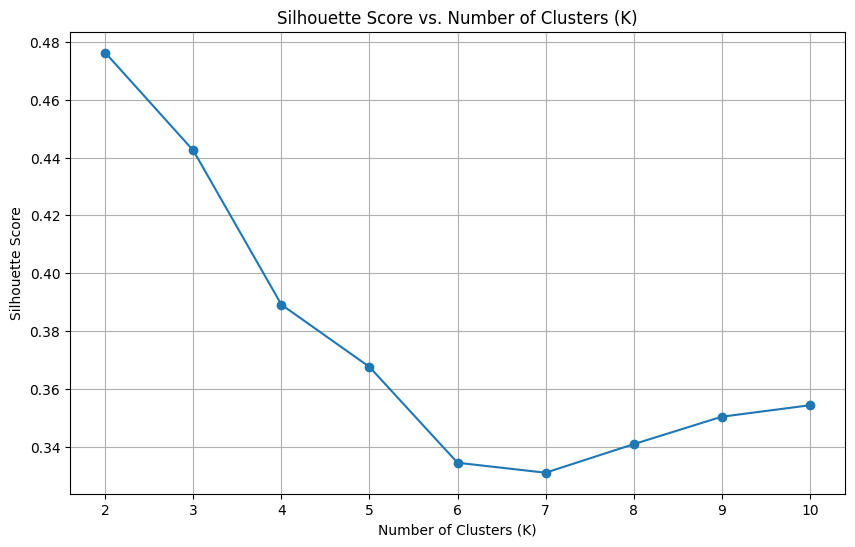

The best number of clusters (K) is: 2


In [14]:
from sklearn.metrics import silhouette_score
# Define a range of values for K (number of clusters)
k_values = list(range(2, 11))  

# Initialize lists to store silhouette scores
silhouette_scores = []

# Perform K-Means clustering for different values of K and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=6804)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores versus the number of clusters (K)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Find the best parameter value (K) with the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters (K) is: {best_k}")

c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

IndexError: list index out of range

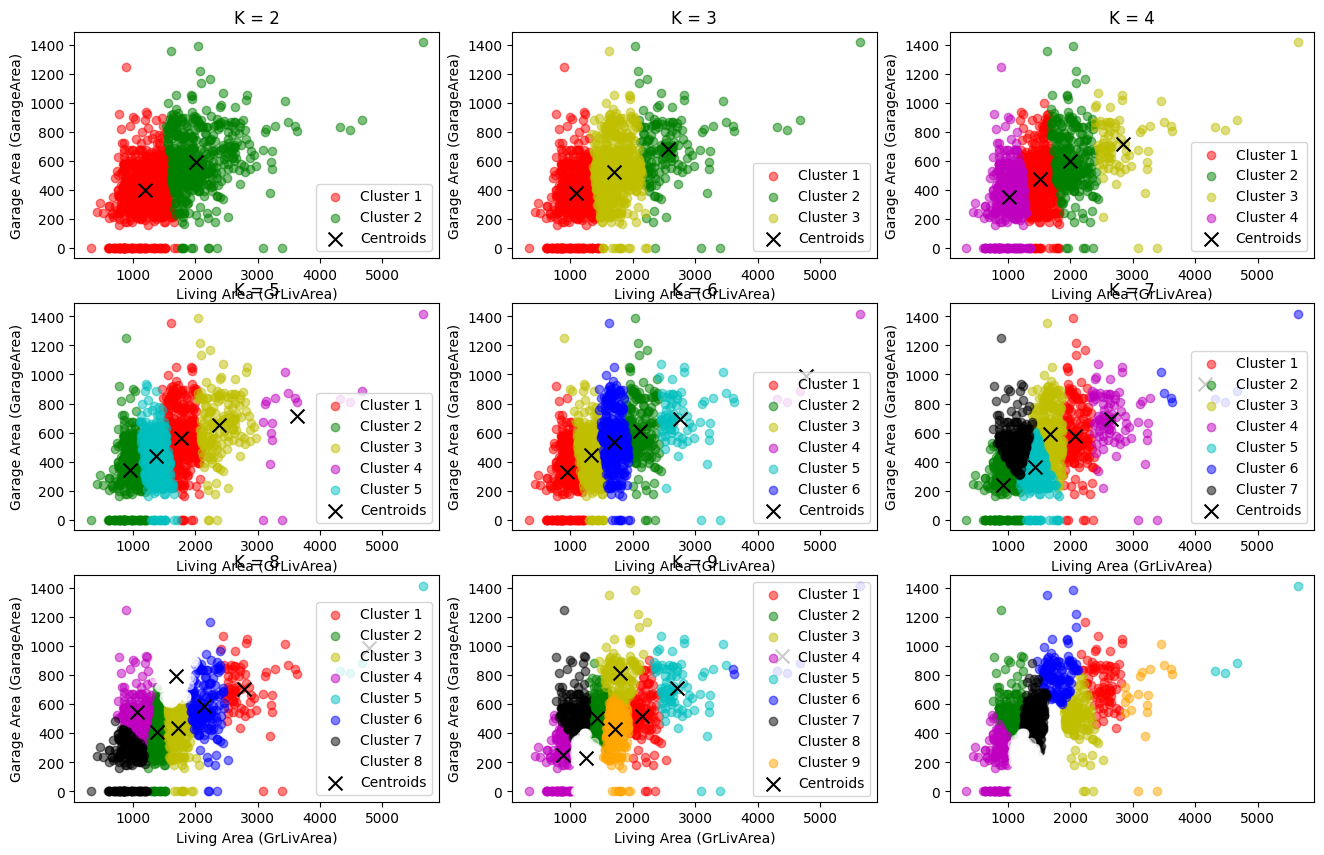

In [27]:
# Define a range of values for K (number of clusters)
k_values = list(range(2, 11))

# Initialize a figure for plotting
plt.figure(figsize=(16, 10))

# Initialize a subplot grid
num_rows = 3
num_cols = 3

for i, k in enumerate(k_values):
    # Create a subplot for each K value
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Perform K-Means clustering for the current K
    kmeans = KMeans(n_clusters=k, random_state=6804)
    kmeans.fit(X)
    
    # Get cluster labels for each data point
    labels = kmeans.labels_
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Visualize the clusters and their centers on the scatterplot
    colors = ['r', 'g', 'y', 'm', 'c', 'b', 'k', 'w', 'orange']
    for j in range(k):
        cluster_points = X[labels == j]
        plt.scatter(cluster_points["GrLivArea"], cluster_points["GarageArea"], c=colors[j], marker='o', alpha=0.5, label=f'Cluster {j + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='x', s=100, label='Centroids')
    
    # Set subplot title and labels
    plt.title(f'K = {k}')
    plt.xlabel("Living Area (GrLivArea)")
    plt.ylabel("Garage Area (GarageArea)")
    plt.legend()

# Adjust subplot layout
plt.tight_layout()

# Find the best parameter value (K) with the highest silhouette score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=6804)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters (K) is: {best_k}")

# Display the plots
plt.show()


TODO5

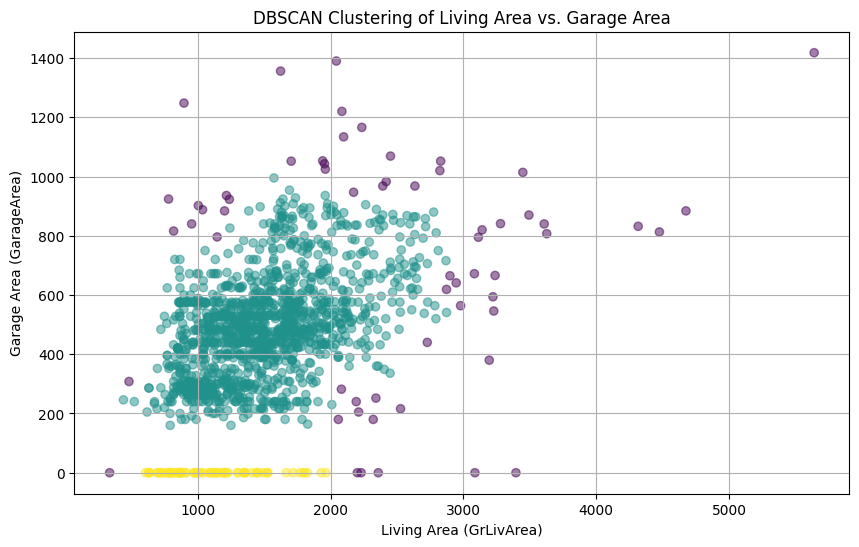

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_scaled = scaler.fit_transform(X)

# Initialize a DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X_scaled)

# Get the cluster labels (-1 represents noise)
labels = dbscan.labels_

# Visualize the clusters and noise points
plt.figure(figsize=(10, 6))
plt.scatter(X["GrLivArea"], X["GarageArea"], c=labels, marker='o', alpha=0.5)
plt.title("DBSCAN Clustering of Living Area vs. Garage Area")
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Garage Area (GarageArea)")
plt.grid(True)
plt.show()

Parameter tuning

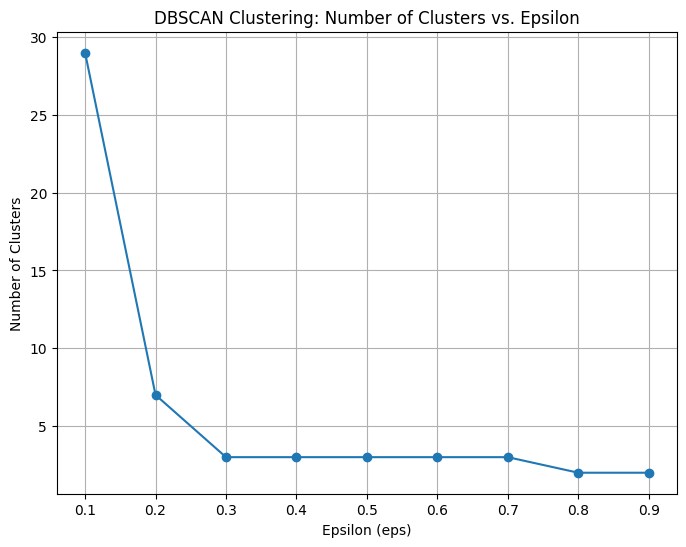

In [17]:
# Initialize lists to store parameters and cluster counts
eps_values = []
cluster_counts = []

# Try a range of eps values
for eps in range(1, 10):
    eps /= 10.0  # Convert to float
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_scaled)
    unique_labels = len(set(dbscan.labels_))  # Count unique cluster labels
    eps_values.append(eps)
    cluster_counts.append(unique_labels)

# Plot the performance versus the epsilon parameter
plt.figure(figsize=(8, 6))
plt.plot(eps_values, cluster_counts, marker='o')
plt.title("DBSCAN Clustering: Number of Clusters vs. Epsilon")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Number of Clusters")
plt.grid(True)
plt.show()

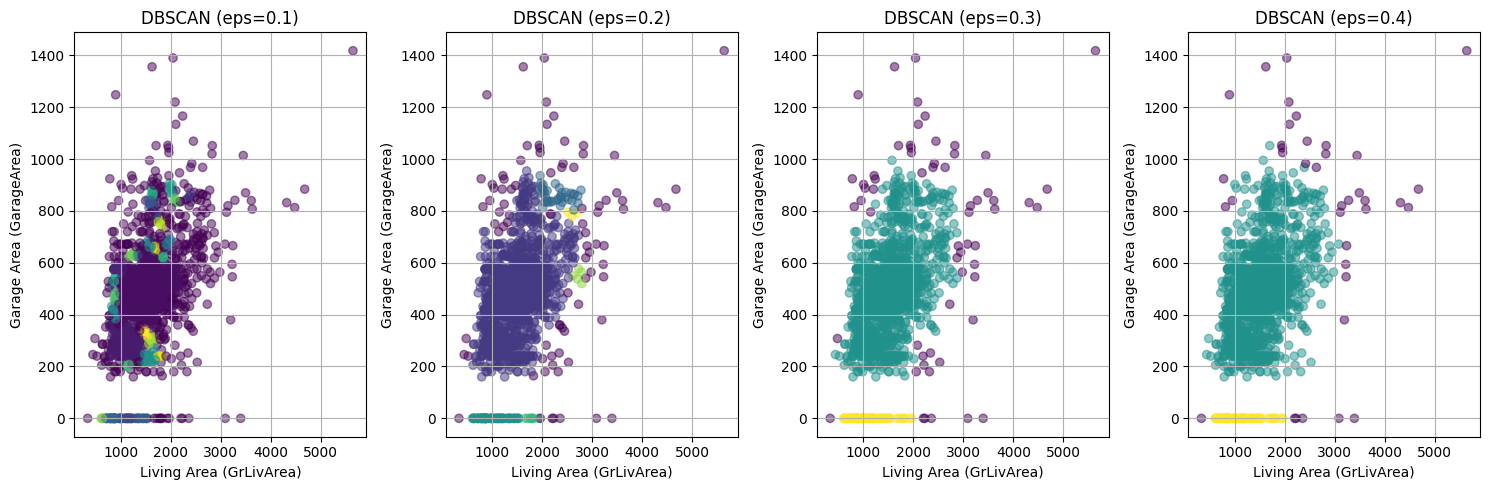

In [24]:
# Define a range of epsilon (eps) values to test
eps_values = [0.1, 0.2, 0.3, 0.4]

# Create a subplot grid for each eps value
fig, axes = plt.subplots(1, len(eps_values), figsize=(15, 5))

for i, eps in enumerate(eps_values):
    # Initialize a DBSCAN model with the current eps value
    dbscan = DBSCAN(eps=eps, min_samples=5)
    
    # Fit the DBSCAN model to the data
    dbscan.fit(X_scaled)
    
    # Get the cluster labels (-1 represents noise)
    labels = dbscan.labels_
    
    # Visualize the clusters and noise points for the current eps value
    ax = axes[i]
    ax.scatter(X["GrLivArea"], X["GarageArea"], c=labels, marker='o', alpha=0.5)
    ax.set_title(f"DBSCAN (eps={eps})")
    ax.set_xlabel("Living Area (GrLivArea)")
    ax.set_ylabel("Garage Area (GarageArea)")
    ax.grid(True)

plt.tight_layout()
plt.show()

TODO6

First of all, K-Mean Requires to specify the number of clusters (k) in advance. Choosing the right value of k can be challenging and subjective. DBSCAN: Does not require to specify the number of clusters in advance. It can automatically discover the number of clusters based on the density of the data.
Then, in outliers, K-Means: Sensitive to outliers as they can significantly affect the positions of cluster centroids. Outliers can lead to suboptimal cluster assignments. DBSCAN: Robust to outliers. Outliers are often classified as noise points and do not influence the cluster structure significantly.
Regarding to Cluster Shape, K-Means: Assumes that clusters are spherical and have roughly equal sizes. It may not perform well on data with non-spherical or irregularly shaped clusters.DBSCAN: Can find clusters of arbitrary shapes and sizes. It is effective in identifying clusters with varying densities and irregular shapes.
In summary, K-Means can work well when we have prior knowledge of the number of clusters and the data is approximately spherical and evenly distributed. DBSCAN, on the other hand, is a robust choice when we want to discover clusters with varying shapes and densities.
